# Quantmod Visualization Tutorial

### Introduction

This will be a short visualization tutorial for working with your own financial data and look a little bit how to work with online assets. If you have your database, you would like to visualize it properly, so with this tutorial you will know which libraries download and the basic tools for technical analysis.

### Let's get started...

Visualize financial data could be something hard If we just have the asset's database and no other platform to work with it. Performance in Excel is a shame, install Metatrader and import databases could be painful and use Bloomberg could be something extremely expensive. R have now this tool for visualize in professional way and work with some natural R extra features.

In [1]:
library('quantmod') #If you don't have it remember to use install.packages('quantmod')
library('zoo') # This library is important to work with time series. 
               # Necessary to boost the use of Quantmod. Remember to install 
               # it also if you don´t have it already.

Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Loading required package: TTR
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Version 0.4-0 included new data defaults. See ?getSymbols.


I've search for XAUUSD (Gold/US Dollar) from 2010-07-21 to 2019-08-21 and downloaded the CSV as "XAUUSD_D1.csv" . When you read the CSV, the structure is in this way:

In [2]:
XAUUSD <- read.csv(file="XAUUSD_D1.csv", header=TRUE, sep=",")
head(XAUUSD) #Just visualize the top data.

date,close,open,high,low,var
2010-07-21,1186.00,1190.90,1198.05,1182.85,-0.01
2010-07-22,1194.95,1184.40,1200.60,1180.55,0.01
2010-07-23,1189.10,1194.55,1203.95,1183.31,0.00
2010-07-26,1182.50,1188.75,1195.30,1179.15,-0.01
2010-07-27,1162.30,1181.40,1187.75,1157.65,-0.02
2010-07-28,1163.55,1162.00,1166.35,1156.90,0.00


We can work with the data using the function "read.zoo". With this R will know that this database is in a time series structure. In format you can change the order of %Y year, %m month or %d day, depending on the order you have it. Remember to set the "index.colums" in the place where the time and date is. Quantmod will read just the columns with the open, close, high and low, ignoring the rest of the unnecesary data.

In [3]:
XAUUSD<- read.zoo(XAUUSD,format="%Y-%m-%d",index.column=1)
head(XAUUSD)

             close    open    high     low   var
2010-07-21 1186.00 1190.90 1198.05 1182.85 -0.01
2010-07-22 1194.95 1184.40 1200.60 1180.55  0.01
2010-07-23 1189.10 1194.55 1203.95 1183.31  0.00
2010-07-26 1182.50 1188.75 1195.30 1179.15 -0.01
2010-07-27 1162.30 1181.40 1187.75 1157.65 -0.02
2010-07-28 1163.55 1162.00 1166.35 1156.90  0.00

Just with this preprocessing, we can begin to visualize using Quantmod. The format is very professional and outstanding for presentations showing the main information, very similar to other platforms such as Bloomberg or Metatrader. 

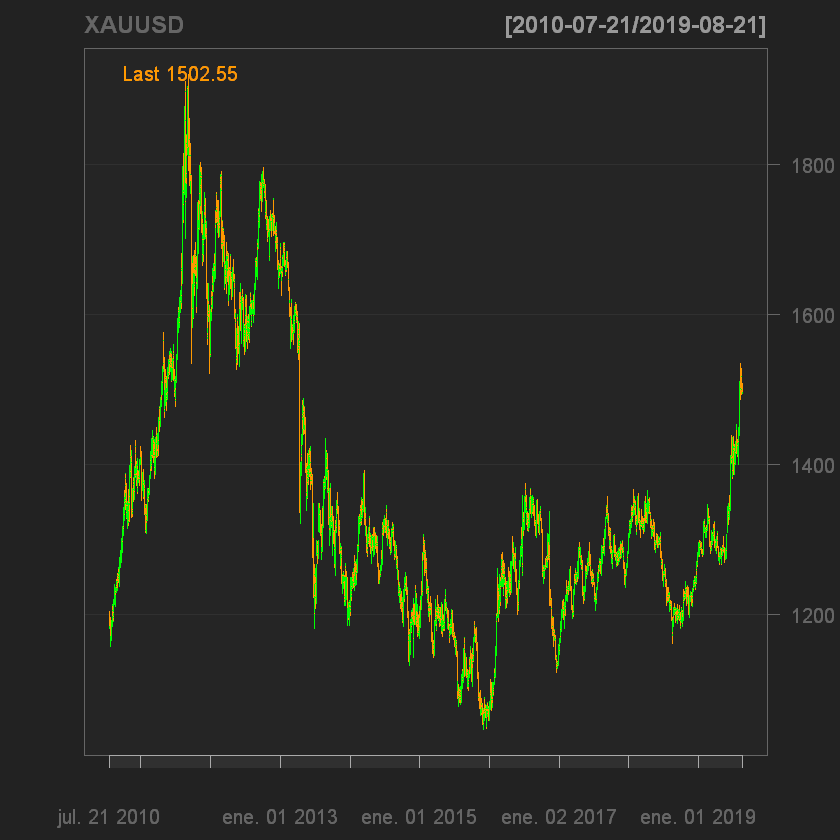

In [4]:
chartSeries(XAUUSD, "bars")

Too much data makes difficult to visualize, lets change the range of visualization to make easy intepretations. We are going to use the function "as.xts" to change the visualization date.

In [5]:
XAUUSD<-as.xts(XAUUSD) #Just in this way

In [6]:
Dates<-'2016-01::2016-05' #Select in this format from when to when visualize
XAUUSD_2014<-XAUUSD[Dates]

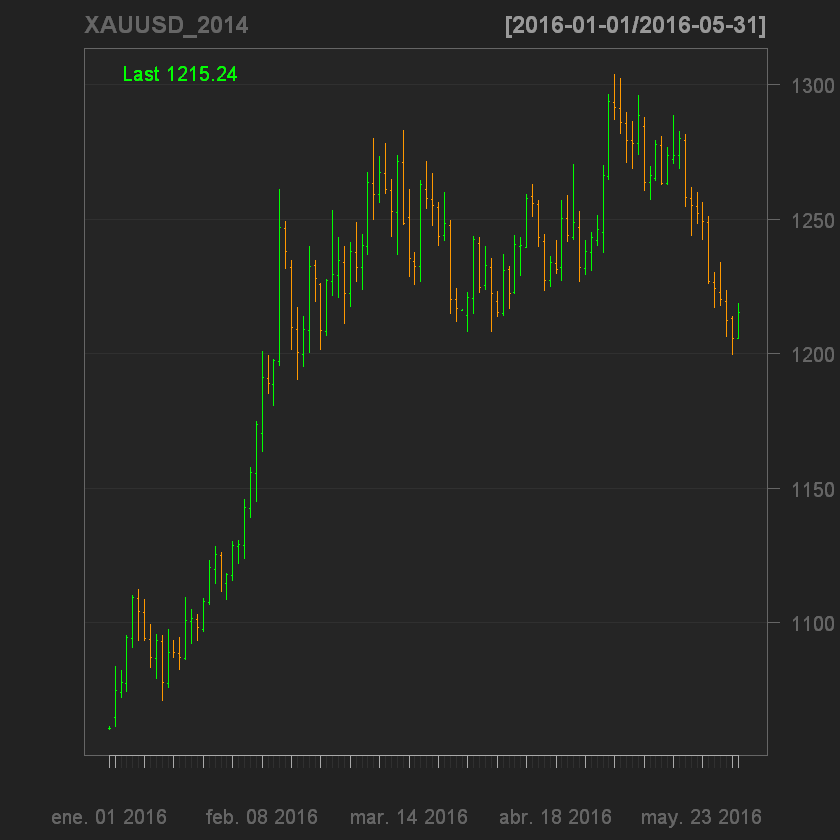

In [7]:
chartSeries(XAUUSD_2014, "bar")

You can also select another ways to visualize financial data. You can choose beetwen the option bar as "candlesticks", "bar", "matchsticks" and "line". We are going to work with the most common way in technical analysis: The candlesticks

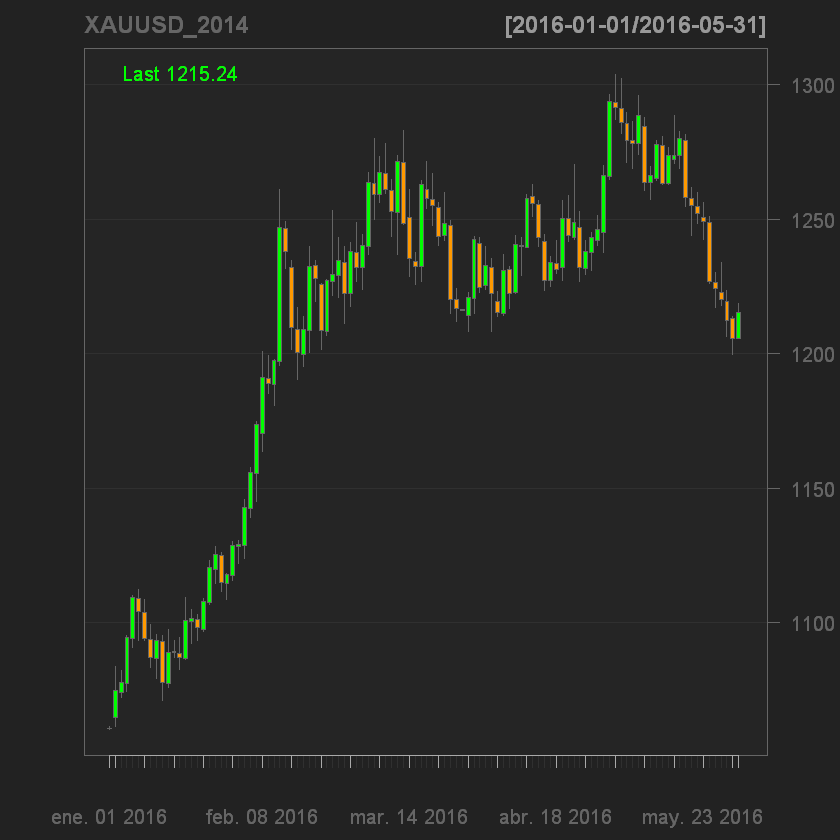

In [8]:
chartSeries(XAUUSD_2014, "candlesticks")

We see and interesting behavior around 1294, maybe a resistance that gold rejects, also a support around 1215. Then, we are going to draw those support and resistance lines.

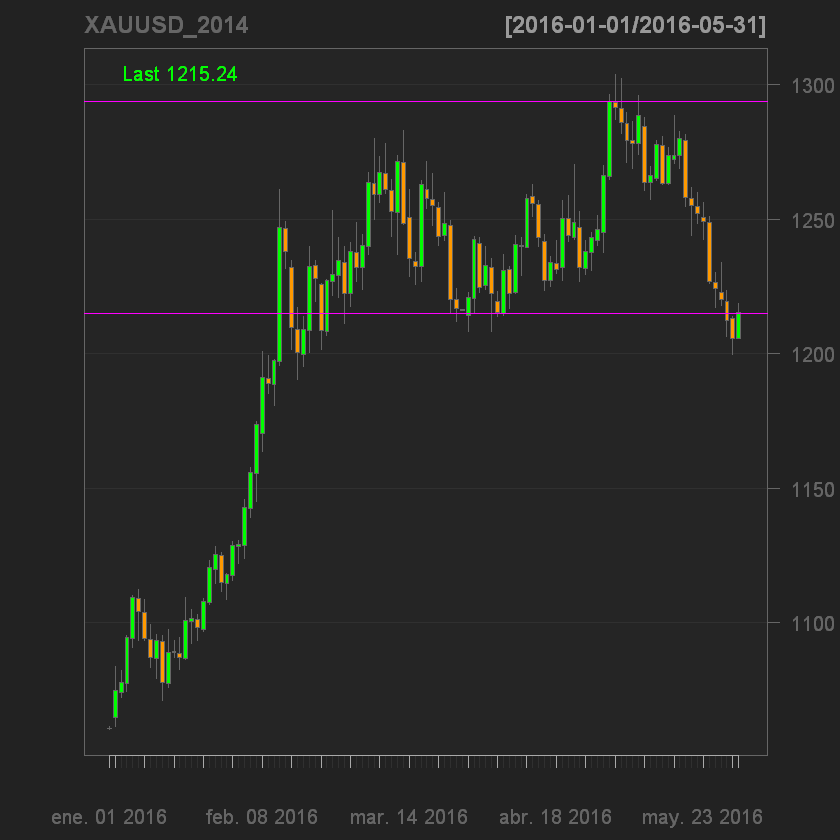

In [9]:
S_P<-c(1294,1215) #Select the quantity of lines desired and the values.
chartSeries(XAUUSD_2014, "candlesticks",TA='addLines(h=S_P,col=6)') #In TA just add the variable name and colour

Right now an indicator could be useful to have more idea about how is behaving this. Lets try the Parabolic SAR, just remember that if the Parabolic SAR is above the price we are in a bearish market but if it is under the price, then, we are in a bullish market. The Parabolic SAR have as parameter the acceleration 0.02 and 0.2. Also we are going to paint it blue.

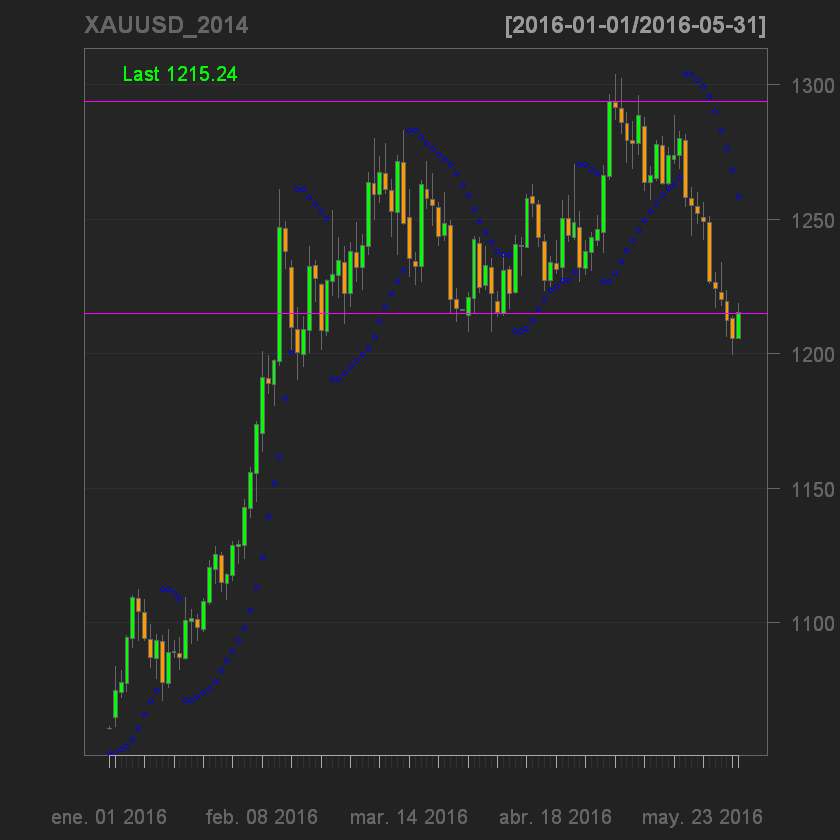

In [10]:
addSAR(accel = c(0.02, 0.2), col = "blue")

Finally add a  RSI for 20 periods using an exponential moving average (EMA).

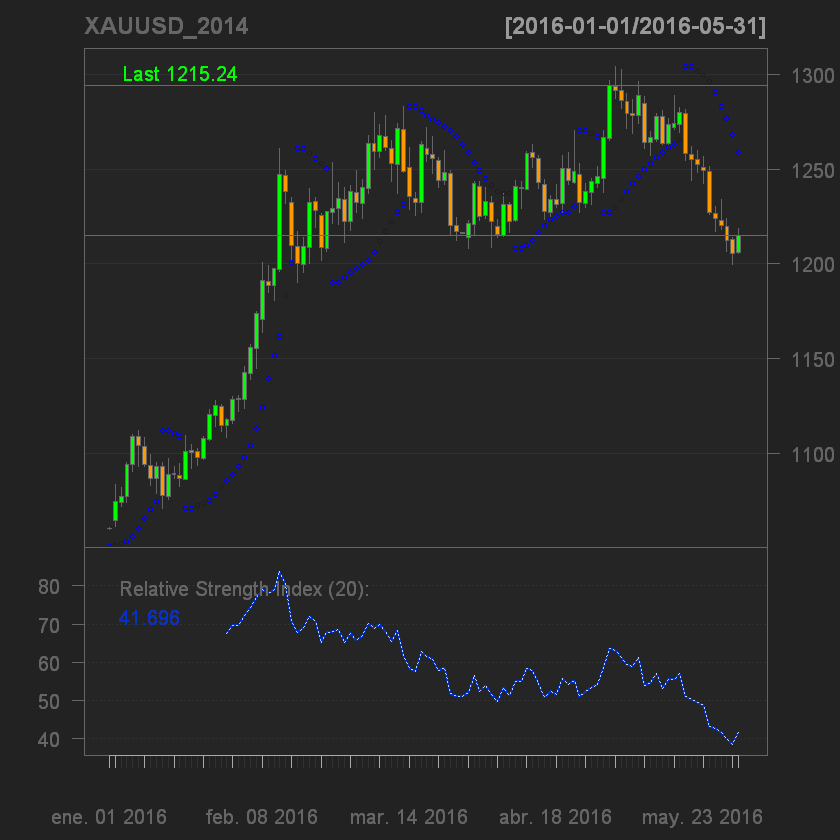

In [11]:
addRSI(n = 20, maType = "EMA")

It is possible to have a conection with online databases. For example, lets use yahoo finance in this case to search information about Apple.

In [12]:
getSymbols.yahoo('AAPL',env=globalenv()) #env means where to store the data.

[1] "AAPL"

The data is already in memory. Then, we can just plot to see the behavior

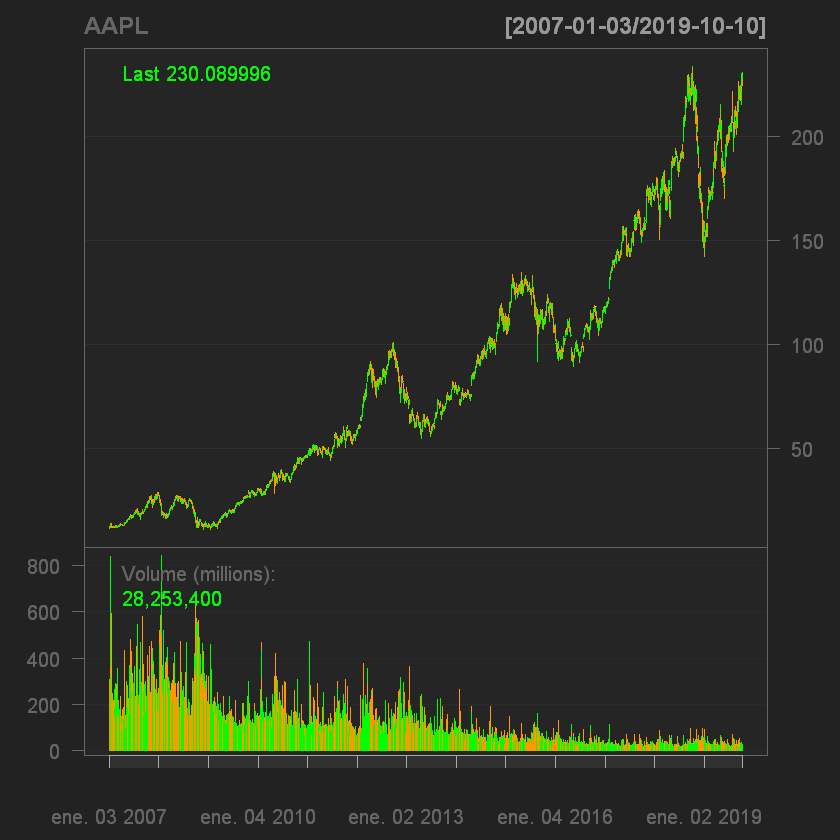

In [13]:
chartSeries(AAPL, "bar")

As we can see, there is all information about Apple since 2007 to 2019. In this case, we have information about the Volume that is also plotted, if Quantmod finds useful data it will use it, if not Quantmod simply ignore it. Let's check the data structure:

In [14]:
head(AAPL)

           AAPL.Open AAPL.High AAPL.Low AAPL.Close AAPL.Volume AAPL.Adjusted
2007-01-03  12.32714  12.36857 11.70000   11.97143   309579900      10.44763
2007-01-04  12.00714  12.27857 11.97429   12.23714   211815100      10.67952
2007-01-05  12.25286  12.31428 12.05714   12.15000   208685400      10.60347
2007-01-08  12.28000  12.36143 12.18286   12.21000   199276700      10.65583
2007-01-09  12.35000  13.28286 12.16429   13.22429   837324600      11.54101
2007-01-10  13.53571  13.97143 13.35000   13.85714   738220000      12.09331

Unfortunately for FX is complicated search online data using Quantmod. This is an excelent tool for other kind of assets. In OANDA we can just search information from the last 180 days, such a pitty for extensive analysis. In the past, Quantmod had issues with yahoo finance, so we can't check all aviable assets from them. Downloading our own databases from our prefered broker's system is, for me, the best option to work.

For further tutorials I'm going to show you more tools for finance: more visualization methods and algorithms in R and Python. I hope you've found useful this tutorial. 

email: luisangelalcantara@yahoo.com